**This is Fashion MNIST image classification using TF CNN**

In [0]:
!pip install -q tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 40kB/s 
     |████████████████████████████████| 3.8MB 43.6MB/s 
     |████████████████████████████████| 450kB 51.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.


In [0]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
1.15.0


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
# import preprocesing modules
from tensorflow.keras.preprocessing import preprocessing 

ImportError: ignored

In [0]:
# import models
from tensorflow.keras.models import Model 

In [0]:
# import layers
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [0]:
# import optimizers 
from tensorflow.keras.optimizers import SGD, Adam

**1. Load the data from Fashion MNIST dataset from tensorflow.**

In [0]:
# load the FMNSIT
#from tensorflow.keras.datasets import fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest,ytest) = fashion_mnist.load_data()

**2. Scale the data and normlize** 

In [0]:
xtrain = xtrain / 255.0     # normalizing the data
xtest = xtest /255.0      # normalizting the data . note that the data range will between 0 and 1. Not -1 and 1. 
# if you are planing to use tanh , it makes sense to move the data points centered around zero.
# currently it is centered around 0.5 
print (xtrain.shape)
  


(60000, 28, 28)


Since the above does not have 4 D data, we need to convert this  into 4 D
NOTE : Do not run the above statement, it will divide the data by 255.
it will be difficult to detect.
As best practice, you may need to run/load the data from fmnist dataset.

In [0]:
print (ytrain.shape)

(60000,)


In [0]:
xtrain = np.expand_dims(xtrain,-1)
xtest = np.expand_dims(xtest,-1)
xtrain.shape

(60000, 28, 28, 1)

If you run twice, it will print as (60000, 28, 28, 1, 1). Re-run from loading step

In [0]:
xtest.shape

(10000, 28, 28, 1)

**3. Build the model using Tensorflow.keras API.**
1. idenify the input size
2. Identify the output size
3. Decide the layers :
  3.1 Number of feature extraction layers
  3.2 Number of Dense layers for classifification

In [0]:
# input  is xtrain.shape[0] will do 
# output is the number of classifications
K = len(set(ytrain))

In [0]:
print("Number of classifications: ",K)

Number of classifications:  10


In [0]:
i = Input(shape=xtrain[0].shape)
#i = Input(shape=xtrain.shape[0]) was statement.
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128,(3, 3), strides=2, activation="relu")(x)
# Flatten before entering into  the classfier layers
x = Flatten()(x)
x = Dropout(0.2)(x)
# do you know what is  the dimension at this stage?
x = Dense(512,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K,activation="softmax")(x)
model = Model (i,x)



**4. Train the model using the data**

In [0]:
# set up loss function
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [0]:
# train the model: Give the train sets and validation sets and specify how many round of iteration you want to do.
r = model.fit(xtrain,ytrain, validation_data=(xtest,ytest),epochs=15) # try with a small set of data now.

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 36s 596us/sample - loss: 0.3635 - accuracy: 0.8637 - val_loss: 0.3558 - val_accuracy: 0.8685
Epoch 2/15
60000/60000 [==============================] - 36s 597us/sample - loss: 0.3114 - accuracy: 0.8834 - val_loss: 0.3213 - val_accuracy: 0.8793
Epoch 3/15
60000/60000 [==============================] - 36s 596us/sample - loss: 0.2760 - accuracy: 0.8953 - val_loss: 0.2935 - val_accuracy: 0.8943
Epoch 4/15
60000/60000 [==============================] - 35s 589us/sample - loss: 0.2522 - accuracy: 0.9053 - val_loss: 0.2912 - val_accuracy: 0.8957
Epoch 5/15
60000/60000 [==============================] - 36s 594us/sample - loss: 0.2311 - accuracy: 0.9118 - val_loss: 0.2942 - val_accuracy: 0.8953
Epoch 6/15
60000/60000 [==============================] - 36s 599us/sample - loss: 0.2127 - accuracy: 0.9196 - val_loss: 0.2822 - val_accuracy: 0.9022
Epoch 7/15
60000/60000 [====================

**5. Verify the losses on both test and train sets**

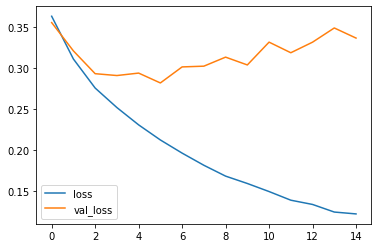

In [0]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()


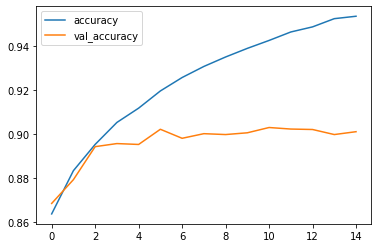

In [0]:
# checking accuracy
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()


test accuracy did not increase when training accuracy increase. 
it is leading to overfitting to the noise.

**6. Check the confusion matrics for verifying the misclassification**

Confusion matrix, without normalization
[[880   3  22  17   1   0  71   0   6   0]
 [  2 978   0  13   2   0   4   0   1   0]
 [ 15   1 864  11  46   0  62   0   1   0]
 [ 12   1  22 907  19   0  36   1   2   0]
 [  1   1  59  25 818   1  95   0   0   0]
 [  0   0   0   0   0 962   0  23   3  12]
 [137   2  66  23  64   0 697   0  11   0]
 [  0   0   0   0   0  10   0 974   0  16]
 [  6   0   4   2   4   0   6   5 973   0]
 [  0   0   0   0   0   3   1  38   0 958]]


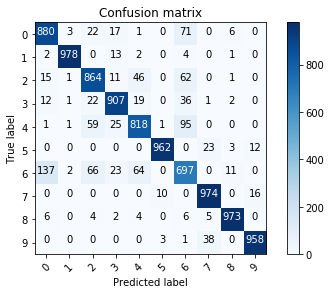

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



ptest = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest, ptest)
plot_confusion_matrix(cm, list(range(10)))



**7. Check if the misclassifications make any sense.**

In [0]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

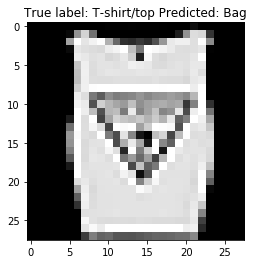

In [0]:
misclassified_idx = np.where(ptest != ytest)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xtest[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[ytest[i]], labels[ptest[i]]));

**8. Check out model Summary to understand the various parameters of the model.**

In [44]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

**9. Have open questions and suggestons to improve the model.**

How to improve the model accuracy. It is around 90% only for validation
95 % for train set